# Calcul symbolique en python
Le but de ce notebook est de montrer comment utiliser la bibliothèque sympy pour faire du calcul symbolique en python.
Les outils mathématiques que nous traiterons avec sympy sont les suivants:
- Représenter des expressions mathématiques symboliques comme les fonctions de plusieurs variables en fonction de symboles, les variables symboliques.
- Dériver, intégrer et simplifier des expressions mathématiques symboliques.
- Représenter graphiquement des fonctions mathématiques symboliques.
- Faire du calcul matriciel symbolique, en particulier des opérations de base sur les matrices pouvant être paramétrées par des symboles. On pourra calculer des noyaux, des images, des déterminants, des inverses, des valeurs propres, des vecteurs propres, etc.

Les outils visités ici sont une petite partie de ce que sympy peut faire. Pour plus d'informations, vous pouvez consulter la documentation officielle de sympy: https://docs.sympy.org/latest/index.html
## Symboles et expressions symboliques
Pour commencer, nous devons importer la bibliothèque sympy et déclarer les symboles que nous allons utiliser. Nous pouvons préciser si les symboles sont réels, complexes, entiers, etc.
La fonction integrate de sympy permet de calculer des intégrales symboliques.

In [94]:
import sympy as sy
a,x,y=sy.symbols('a x y',real=True)
r=sy.sqrt(x**2+y**2) # r est ici une expression symbolique en fonction de x et y
f=r**2
g=sy.integrate(f,(x,-1,a),(y,-1,1))
print(g)
display(g)# affichage de g esthétique pouvant être copié-collé dans un document LaTeX
latex_g=sy.latex(g)# conversion de g en code LaTeX
print(latex_g)# affichage de g en code LaTeX

2*a**3/3 + 2*a/3 + 4/3


2*a**3/3 + 2*a/3 + 4/3

\frac{2 a^{3}}{3} + \frac{2 a}{3} + \frac{4}{3}


La fonction diff de sympy permet de calculer des dérivées symboliques, on peut préciser combien de fois on veut dériver une expression en fonction d'une variable donnée.

In [95]:
gprime=sy.diff(g,a)
print(gprime)
gsec=sy.diff(g,a,2)
print(gsec)

2*a**2 + 2/3
4*a


Plutôt qu'utiliser la fonction diff, on peut aussi utiliser la méthode diff de l'objet symbolique et obtenir le même résultat.

In [96]:
gprime=g.diff(a)
gtierc=gprime.diff(a,2)
display(gtierc)

4

- Exercice 1: Calculer la dérivée de la fonction $f(x) = x^3 + 2x^2 + 3x + 4$ par rapport à $x$.
- Exercice 2: Calculer l'intégrale de la fonction $f(x) = x^3 + 2x^2 + 3x + 4$ par rapport à $x$.
- Exercice 3: Calculer la dérivée seconde de la fonction $f(x) = \sqrt{5\cos(x)}$ par rapport à $x$.
- Exercice 4: (Simplification) Simplifier l'expression $2x + x - 3x + 4 - 5$ à l'aide de la fonction simplify de sympy. Quand une expression proposée par un calcul symbolique semble compliquée, il est souvent utile de la simplifier pour mieux comprendre sa structure. Parfois le résultat sera décevant, mais parfois il sera surprenant. Il existe d'autres fonctions de simplification dans sympy, comme trigsimp, powsimp, etc. On peut également développer une expression avec la fonction expand et factoriser une expression avec la fonction factor. Tester ces fonctions sur des polynômes.

## Résolution d'équations
La fonction solve de sympy permet de résoudre des équations symboliques. On peut résoudre des équations polynomiales, des équations trigonométriques, des équations exponentielles, etc.
Dans les exemples ci-dessous, nous résolvons des équations polynomiales, l'intersection d'une parabole et d'une droite.

In [97]:
x,y=sy.symbols('x y',real=True)
parabol=sy.Eq(x**2,4*y)
droite=sy.Eq(x,2*y-1)
sol=sy.solve([parabol,droite],(x,y))
display(sol)

[(1 - sqrt(3), 1 - sqrt(3)/2), (1 + sqrt(3), sqrt(3)/2 + 1)]

## Représentation graphique de fonctions symboliques
La fonction plot de sympy permet de représenter graphiquement des fonctions symboliques. On peut préciser l'intervalle sur lequel on veut représenter la fonction. On ne doit pas confondre la fonction plot de sympy avec la fonction plot de matplotlib qui permet de représenter des données numériques. On peut représenter plusieurs fonctions sur le même graphique.


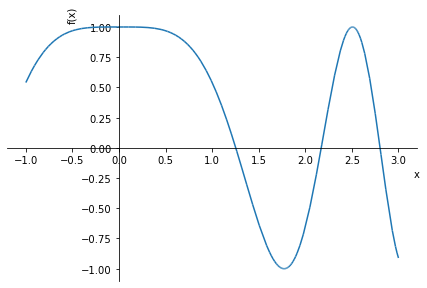

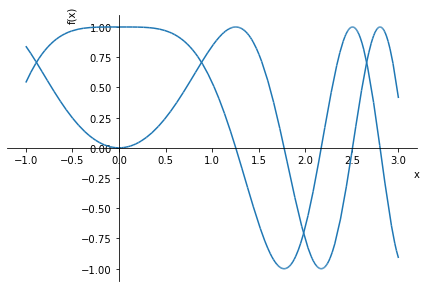

In [98]:
f=sy.cos(x**2)
sy.plot(f,(x,-1,3));
sy.plot(f,sy.sin(x**2),(x,-1,3));

Pour représenter des graphes d'une fonction implicite, on peut utiliser la fonction plot_implicit de sympy. On doit préciser l'équation implicite de la fonction à représenter.

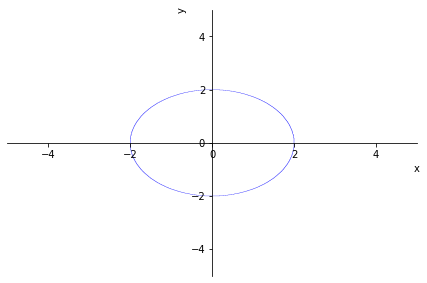

In [99]:
x,y=sy.symbols('x y',real=True)
circle = sy.Eq(x**2 + y**2, 4)

sy.plot_implicit(circle);

On pourra fusionner deux graphes en un seul comme suit.

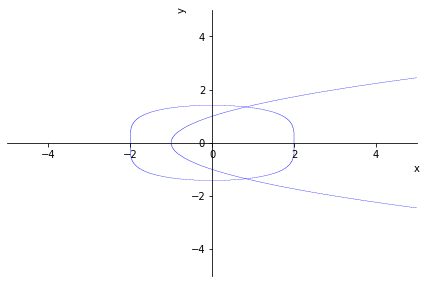

In [100]:
p1 = sy.plot_implicit(sy.Eq(x**2 + y**4, 4), show=False)
p2 = sy.plot_implicit(sy.Eq(y**2, x + 1), show=False)

# Fusionner les graphiques
p1.extend(p2)
p1.show()

Pour représenter des courbes paramétriques, on peut utiliser la fonction plot_parametric de sympy. On doit préciser les expressions des coordonnées x et y en fonction d'un paramètre t.

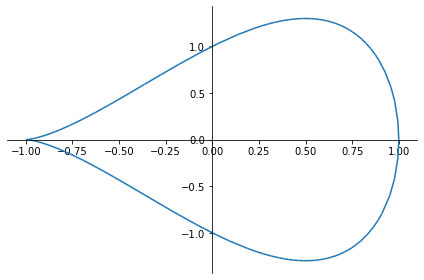

In [101]:
t=sy.symbols('t')
x=sy.cos(t)
y=sy.sin(t)+sy.sin(2*t)/2
sy.plot_parametric((x, y, (t, 0, 2 * sy.pi)));

- Exercice 5: Représenter graphiquement la fonction $f(x) = x^3 + 2x^2 + 3x + 4$ sur l'intervalle $[-10, 10]$.
- Exercice 6: Représenter graphiquement la fonction implicite $x^4 + 4y^4 = 1$.
- Exercice 7: Représenter graphiquement la courbe paramétrique $x(t) = \cos(t+t^2)$ et $y(t) = \sin(t)$ sur l'intervalle $[0, 2\pi]$.
- Exercice 8: Définir l'intersection de la courbe implicite $x^2 + y^2  = 4$ (cercle) avec la droite $y = x+1$, afficher les coordonnées des points et représenter sur un même graphe les deux courbes. Vérifier que les points d'intersection sont visiblement les bons.
- Exercice 9: Calculer l'intégrale de la fonction $f(x,y) = x^2 + y^2$ sur le domaine triangulaire  $T = \{(x,y) \in \mathbb{R}_+^2 | x + y \leq c\}$ avec $c>0$ et tracer le résultat en fonction de $c$.

### Evaluation numérique
La fonction evalf de sympy permet d'évaluer une expression symbolique. On peut préciser la précision de l'évaluation.
On peut également substituer une variable symbolique par une valeur numérique en utilisant la méthode subs de l'objet symbolique.

In [102]:
import sympy as sy

display(sy.cos(sy.pi/6))
display(sy.cos(1))
display(sy.cos(1).evalf())
display(sy.cos(1).evalf(30))# avec 30 chiffres significatifs
x, y = sy.symbols('x y')
f = x**2 + y**2 - x*y
display(f.subs(x, 1))
display(f.subs(x, 1).subs(y, 2))
display(f.subs(x, y))

sqrt(3)/2

cos(1)

0.540302305868140

0.540302305868139717400936607443

y**2 - y + 1

3

y**2

- Exercice 10: Evaluer la dérivée seconde de la fonction $f(x) = \sqrt{5\cos(x)}$ en $x = 1$, avec 20 chiffres significatifs.

## Outils d'algebre linéaire
Pour une description détaillée des outils d'algèbre linéaire de sympy, vous pouvez consulter la documentation officielle de sympy:
https://docs.sympy.org/latest/tutorials/intro-tutorial/matrices.html

On s'initiera ici avec quelques outils de base de l'algèbre linéaire de sympy.

La fonction Matrix de sympy permet de définir des matrices symboliques. On peut faire des opérations de base sur les matrices comme l'addition, la soustraction, la multiplication, le calcul du déterminant, de l'inverse, de la transposée, etc.
On définit une matrice de sympy en convertissant une liste de listes en une matrice de sympy.



In [103]:
import sympy as sy

A=sy.Matrix([[1,2],[3,4]])
display(A)
Alatex=sy.latex(A)
print(Alatex)

Matrix([
[1, 2],
[3, 4]])

\left[\begin{matrix}1 & 2\\3 & 4\end{matrix}\right]


On peut renseigner une matrice diagonale à l'aide de ses coefficients diagonaux avec la fonction diag de sympy. On peut avoir des coefficients de la matrice qui sont des expressions symboliques. On peut modifier des sous-matrices d'une matrice de sympy. On ne confondra pas un vecteur ligne et un vecteur colonne. On pourra alors calculer des produits matriciels, des puissances de matrices, des transposées.

In [104]:
B=sy.diag(1,2,3)
Desun=sy.ones(3,3)
display(B)
C=sy.Matrix([4,5,6])
display(C)
a=sy.symbols('a')
D=sy.Matrix([[1,2,a]])
display(D)
B[:,2]=C
display(B)
M=B.copy()
M[1,:]=D
display('M et B',M,B)
display('M+B=',M+B)
display('MB=',M*B)
display('MC=',M*C)
display('M^2=',M**2)
display('M^t=',M.T)

Matrix([
[1, 0, 0],
[0, 2, 0],
[0, 0, 3]])

Matrix([
[4],
[5],
[6]])

Matrix([[1, 2, a]])

Matrix([
[1, 0, 4],
[0, 2, 5],
[0, 0, 6]])

'M et B'

Matrix([
[1, 0, 4],
[1, 2, a],
[0, 0, 6]])

Matrix([
[1, 0, 4],
[0, 2, 5],
[0, 0, 6]])

'M+B='

Matrix([
[2, 0,     8],
[1, 4, a + 5],
[0, 0,    12]])

'MB='

Matrix([
[1, 0,       28],
[1, 4, 6*a + 14],
[0, 0,       36]])

'MC='

Matrix([
[      28],
[6*a + 14],
[      36]])

'M^2='

Matrix([
[1, 0,      28],
[3, 4, 8*a + 4],
[0, 0,      36]])

'M^t='

Matrix([
[1, 1, 0],
[0, 2, 0],
[4, a, 6]])

- Exercice 11: Calculer le produit des matrices $A = \begin{pmatrix} 1 & 2 \\ 3 & 4 \end{pmatrix}$ et $B = \begin{pmatrix} 5 & 6 \\ 7 & 8 \end{pmatrix}$.
- Exercice 12: Modifier la matrice obtenue en affectant que des $1$ à la dernière ligne, en utilisant la fonction ones de sympy.



On dispose de fonctions ou méthodes pour calculer le déterminant, l'inverse, le noyau, l'image, les valeurs propres, les vecteurs propres, etc.
En voici quelques exemples.

In [105]:
A=sy.ones(4,4)+2*sy.diag(1,1,1,1)
display(A)
display(sy.det(A))
display(A.det())
display(A.inv())
display(A*A.inv())
B=sy.ones(4,4)
B[0,0]=2
B[1,1]=3
display('B',B)
display('B.det()',B.det())


Matrix([
[3, 1, 1, 1],
[1, 3, 1, 1],
[1, 1, 3, 1],
[1, 1, 1, 3]])

48

48

Matrix([
[ 5/12, -1/12, -1/12, -1/12],
[-1/12,  5/12, -1/12, -1/12],
[-1/12, -1/12,  5/12, -1/12],
[-1/12, -1/12, -1/12,  5/12]])

Matrix([
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 1, 0],
[0, 0, 0, 1]])

'B'

Matrix([
[2, 1, 1, 1],
[1, 3, 1, 1],
[1, 1, 1, 1],
[1, 1, 1, 1]])

'B.det()'

0

In [106]:
display('valeurs propores de A',A.eigenvals())# on obtient les valeurs propres et leur multiplicité
display('valeurs propores de B',B.eigenvals())
print('-------------------')
print('eigenvects renseigne les valeurs propres, leur multiplicité')
print('et les vecteurs propres associés au format Matrix')
display(A.eigenvects())# on obtient les valeurs propres, leur multiplicité et les vecteurs propres associés

'valeurs propores de A'

{6: 1, 2: 3}

'valeurs propores de B'

{7/3 + 16/(9*(101/54 + sqrt(687)*I/18)**(1/3)) + (101/54 + sqrt(687)*I/18)**(1/3): 1,
 7/3 + 16/(9*(-1/2 + sqrt(3)*I/2)*(101/54 + sqrt(687)*I/18)**(1/3)) + (-1/2 + sqrt(3)*I/2)*(101/54 + sqrt(687)*I/18)**(1/3): 1,
 7/3 + (-1/2 - sqrt(3)*I/2)*(101/54 + sqrt(687)*I/18)**(1/3) + 16/(9*(-1/2 - sqrt(3)*I/2)*(101/54 + sqrt(687)*I/18)**(1/3)): 1,
 0: 1}

-------------------
eigenvects renseigne les valeurs propres, leur multiplicité
et les vecteurs propres associés au format Matrix


[(2,
  3,
  [Matrix([
   [-1],
   [ 1],
   [ 0],
   [ 0]]),
   Matrix([
   [-1],
   [ 0],
   [ 1],
   [ 0]]),
   Matrix([
   [-1],
   [ 0],
   [ 0],
   [ 1]])]),
 (6,
  1,
  [Matrix([
   [1],
   [1],
   [1],
   [1]])])]

In [107]:
display('Noyau de A',A.nullspace())
display('Noyau de B, de dimension 1, engendré par 1 vecteur',B.nullspace())
display('Rang de A',A.rank())
display('Rang de B',B.rank())
display('Image de A',A.columnspace())
display('Image de B, engendrée par 3 vecteurs (rang=3)',B.columnspace())

'Noyau de A'

[]

'Noyau de B, de dimension 1, engendré par 1 vecteur'

[Matrix([
 [ 0],
 [ 0],
 [-1],
 [ 1]])]

'Rang de A'

4

'Rang de B'

3

'Image de A'

[Matrix([
 [3],
 [1],
 [1],
 [1]]),
 Matrix([
 [1],
 [3],
 [1],
 [1]]),
 Matrix([
 [1],
 [1],
 [3],
 [1]]),
 Matrix([
 [1],
 [1],
 [1],
 [3]])]

'Image de B, engendrée par 3 vecteurs (rang=3)'

[Matrix([
 [2],
 [1],
 [1],
 [1]]),
 Matrix([
 [1],
 [3],
 [1],
 [1]]),
 Matrix([
 [1],
 [1],
 [1],
 [1]])]

- Exercice 13: Calculer le déterminant de la matrice $A = \begin{pmatrix} 1 & 2 \\ 3 & 4 \end{pmatrix}$. Son noyau et son image.
- Exercice 14: Donner les valeurs propres et les vecteurs propres de la matrice $A = \begin{pmatrix} 1 & 2 \\ 3 & 4 \end{pmatrix}$.

- Exercice 15: Calculer lorsque c'est possible l'inverse de la matrice $A = \begin{pmatrix} 1 & 2 \\ a & 4 \end{pmatrix}$ pour $a$ un parmètre réel et donner le noyau de $A$ en fonction de $a$.


